[Reference](https://medium.com/swlh/feature-transformation-and-scaling-techniques-f9645cb538e)

# Why Feature transformation is necessary?

The feature with larger values will affect the output more. Therefore, we need to implement feature transformation. And, there are 9 techniques we can use:

1. Min Max Scaler
2. Standard Scaler
3. MaxAbsScaler
4. Robust Scaler
5. Quantile Transformer Scaler
6. Log Transformation
7. Power Transformer Scaler
8. Unit Vector Scaler/Normalizer


Let's practice using simple examples

In [3]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
df = pd.DataFrame({
    'Name':['Branden','John','Kim','Karsaw','James'],
    'age':[22,21,20,19,24],
    'score':[100,80,90,70,95]
})
df.head()

,Name,age,score
0,Branden,22,100
1,John,21,80
2,Kim,20,90
3,Karsaw,19,70
4,James,24,95


# 1. Min Max Scaler

x_scaled = (x-x_min)/(x_max - x_min)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

column_names = ['age', 'score']
features = df[column_names]
features[column_names] = scaler.fit_transform(features.values)
features

,age,score
0,0.6,1.000000
1,0.4,0.333333
2,0.2,0.666667
3,0.0,0.000000
4,1.0,0.833333


The range of Min-Max scaler is between 0 and 1. And, we can set a custom range if we want.

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(2,4))

column_names = ['age', 'score']
features = df[column_names]
features[column_names] = scaler.fit_transform(features.values)
features

,age,score
0,3.2,4.000000
1,2.8,2.666667
2,2.4,3.333333
3,2.0,2.000000
4,4.0,3.666667


# 2. Standard Scaler
x_scaled = x — mean/std_dev

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
colum_names = ['age', 'score']
features = df[column_names]
features[column_names] = scaler.fit_transform(features.values)
features

,age,score
0,0.464991,1.207020
1,-0.116248,-0.649934
2,-0.697486,0.278543
3,-1.278724,-1.578410
4,1.627467,0.742781


# 3. MaxAbsScaler
1. Takes the absolute value of each value in the column.
2. Find the max value of the column.
3. Divides the max value with each value in the column.

In [9]:
features = df[['age','score']]
features['salary'] = [18000,20000,10000,2600,23000]

In [10]:
features

,age,score,salary
0,22,100,18000
1,21,80,20000
2,20,90,10000
3,19,70,2600
4,24,95,23000


In [12]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
column_names = ['age','score','salary']
features[column_names] = scaler.fit_transform(features.values)
print(features.salary)

0    0.782609
1    0.869565
2    0.434783
3    0.113043
4    1.000000
Name: salary, dtype: float64


In [13]:
features

,age,score,salary
0,0.916667,1.00,0.782609
1,0.875000,0.80,0.869565
2,0.833333,0.90,0.434783
3,0.791667,0.70,0.113043
4,1.000000,0.95,1.000000


In [15]:
values = [18000,20000,10000,2600,23000]
abs_values = [abs(value) for value in values]
max_val = max(abs_values)
val = [value/max_val for value in abs_values]
val

[0.782608695652174,
 0.8695652173913043,
 0.43478260869565216,
 0.11304347826086956,
 1.0]

# 4. Robust Scaler
It is not sensitive to outliers and it can use IQR(Inter Qurtile Range) to scales the data

IQR = Q3-Q1

X_scaled = (X-Q1)/(Q3-Q1)

In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
column_names = ['age','score']
features = df[column_names]
features[column_names] = scaler.fit_transform(features.values)
features

,age,score
0,0.5,0.666667
1,0.0,-0.666667
2,-0.5,0.000000
3,-1.0,-1.333333
4,1.5,0.333333


# 5. Quantile Transformer Scaler
It converts the distribution of data into normal distribution and it handles the outliers: Outlier Removal, Scaling Data, and Conversion into the normal distribution

In [19]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()
column_names = ['age','score']
features = df[column_names]
features[column_names] = scaler.fit_transform(features.values)
features

,age,score
0,0.75,1.00
1,0.50,0.25
2,0.25,0.50
3,0.00,0.00
4,1.00,0.75


# 6. Log Transform
It is used to convert a skewed distribution to a normal distribution or less-skewed distribution

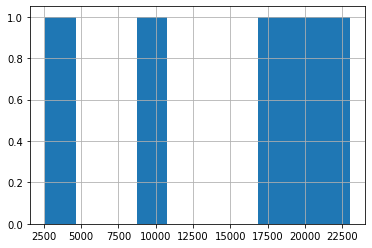

In [21]:
features = df[['age','score']]
features['salary'] = [18000,20000,10000,2600,23000]
features.salary.hist()

0     9.798127
1     9.903488
2     9.210340
3     7.863267
4    10.043249
Name: salary, dtype: float64


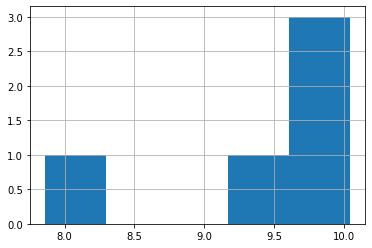

In [22]:
import numpy as np
features['salary'] = np.log(features['salary'])
print(features.salary)
features.salary.hist(bins=5)

# 7. Power Transformer Scaler
It also changes the distribution of the variable into a more Gaussian(normal) distribution
- Box-Cox Transformation
- The Yeo-Johnson transform



In [23]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')

'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

column_names = ['age','score']
features = df[column_names]
features[column_names] = scaler.fit_transform(features.values)
features

,age,score
0,0.574832,1.319850
1,0.008885,-0.745842
2,-0.650181,0.175556
3,-1.423570,-1.467936
4,1.490034,0.718372


# 8. Unit Vector Scaler/Normalizer
It works upon each row of the data frame rather than working on columns. There are two norms: l1 and l2
- If we use L1 norm, the sum of absolute value along the row will be 1
- If we use L2 norm, the sum of the squared absolute values along the row will be 1

In [24]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm='l2')

# norm = 'l2' is a default parameter

column_names = ['age','score']
features = df[column_names]
features[column_names] = scaler.fit_transform(features.values)
features

,age,score
0,0.214862,0.976644
1,0.253898,0.967231
2,0.216930,0.976187
3,0.261951,0.965081
4,0.244936,0.969539


In [25]:
features['sum']=abs(features['age'])+abs(features['score'])
features

,age,score,sum
0,0.214862,0.976644,1.191506
1,0.253898,0.967231,1.221129
2,0.216930,0.976187,1.193118
3,0.261951,0.965081,1.227032
4,0.244936,0.969539,1.214475


# 9. Custom Transformer

In [26]:
from sklearn.preprocessing import FunctionTransformer
transformer  = FunctionTransformer(np.log2,validate=True)

column_names = ['age','score']
features = df[column_names]
features[column_names] = transformer.fit_transform(features.values)
features

,age,score
0,4.459432,6.643856
1,4.392317,6.321928
2,4.321928,6.491853
3,4.247928,6.129283
4,4.584963,6.569856
